# Loading packages

In [1]:
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
import gensim
import numpy as np
import statistics

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading everything

In [3]:
# loading the previously trained Word2Vec models
female_model = Word2Vec.load("/content/drive/MyDrive/Thesis - Detecting Bias/Data Thesis/female_word2vec.model")
male_model = Word2Vec.load("/content/drive/MyDrive/Thesis - Detecting Bias/Data Thesis/male_word2vec.model")

In [4]:
# Only save gendered words that are present in the models
male_words = ["nephew", "nephews", "father", "dad", "daddies", "grandfather", "step-son", "step-sons", "men", "son-in-law", "king", "daddy", "son", "groom", "grooms", "gentleman", "gentlemen", "sir", "lad", "grandson", "grand-son", "dads", "prince", "stepfathers", "boyfriend", "males", "grandfathers", "grand-fathers", "husband", "husbands", "boy", "bachelor", "bachelors", "duke", "sirs", "papas", "heir", "uncle", "mr", "lords", "father-inlaw", "sons-in-law", "fiances","fiance", "uncles", "lads", "brother", "grandpa", "grandpas", "heirs", "male",  "grandsons", "grandsons", "boys", "he", "step-father", "bridegroom", "bridegrooms stepfather",  "mr.", "brothers", "man", "sons", "boyfriends", "he’s", "his", "him", "stepson", "stepsons", "guy", "spokesman", "spokesmen", "pa", "dude", "dudes", "paternal", "brotherhood", "countryman", "countrymen", "suitor", "macho", "papa", "strongman", "strongmen", "boyhood", "manhood", "masculine", "macho", "horsemen", "brethren", "chap", "chaps", "schoolboy", "schoolboys", "bloke", "blokes", "patriarch", "patriachy", "fatherhood", "hubby", "hubbies", "fella", "fellas","fraternal", "bro", "masculinity", "pappy", "papi", "pappies", "dada", "bf", "bfs", "knights", "knight", "menfolk", "brotherly", "manly", "pimp", "pimps", "homeboy", "homeboys", "grandnephew", "grandnephew", "grand-nephew", "grand-nephews", "nobleman", "noblemen", "dream boy", "himself", "gramps"]
female_words = ["niece", "mother", "duchesses", "mom", "belle", "belles", "mummies",  "grandmother", "landlady", "landladies", "nuns", "stepdaughter", "women", "daughter-in-law", "daughter", "queens", "brides", "lady", "queen", "matron",  "mummy", "madam", "granddaughter", "grand-daughter", "moms", "princess", "stepmothers", "stepdaughters", "girlfriend", "females", "grand-mothers", "grandmothers", "step-daughter", "nieces", "wife", "mother", "wives", "girl", "duchess", "madams", "mamas", "aunt", "princesses", "fiancee", "mrs", "ladies", "mother-in-law", "bride", "daughters-in-law", "aunts", "sister", "grandma", "grandmas", "female", "granddaughters", "grand-daughters", "girls", "she", "stepmother", "stepmother", "mrs.", "sisters", "mama", "woman", "daughters", "girlfriends", "she’s", "her", "maid", "mum", "maiden", "maidens", "dudette", "maternal", "sisterhood", "housewife", "housewives", "chick", "chicks", "mommy", "babe", "babes", "diva", "divas", "gal", "gals", "sistren", "schoolgirl", "schoolgirls", "matriarch", "matriarchy", "motherhood", "wifey", "sis", "femininity", "granny", "grannies", "mami", "momma", "gf", "gfs", "damsel", "damsels", "vixen", "vixens", "nan", "nanny", "nannies", "auntie", "womenfolk", "sisterly", "motherly", "homegirl", "homegirls", "grand-niece", "grand-nieces", "grandniece", "grandnieces", "dream girl", "madame", "herself", "hers"]

# create 2 empty list to store the words that are present in the mr. Robot and the Crown word models
male = []
female = []

# in this for loop I walk through the lists I created, and if the words of those lists are in the dataset
# then I store them in the male and female lists which will be used for my mean word embeddings later.
for word in male_words:
    if word in female_model.wv:
        if word in male_model.wv:
            male.append(word)
            
for word in female_words:
    if word in female_model.wv:
        if word in male_model.wv:
            female.append(word)


## Load dataset

In [ ]:
path = "/content/drive/MyDrive/Thesis - Detecting Bias/Data Thesis/hansard-speeches-v310.csv"
df = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,10,11,12,15,16,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
%%capture
! pip install gender_guesser
import gender_guesser.detector as gender


In [ ]:
path = "/content/drive/MyDrive/Thesis - Detecting Bias/Data Thesis/hansard-speeches-v310.csv"
df = pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,10,11,12,15,16,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# create female and male subsets
df_sub = df[df.year >= 2015]
df3 = df_sub[['speakername','speech','party']]

d = gender.Detector()

df3['first_name'] = df3['speakername'].str.split(' ').str[0]
df3['gender'] = df3['first_name'].map(lambda x: d.get_gender(x))
df3_male = df3[df3['gender']=='male']
df3_female = df3[df3['gender']=='female']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3.gender.value_counts()

male             255571
female           101319
unknown           28803
mostly_male       17206
mostly_female     10332
andy               3923
Name: gender, dtype: int64

In [ ]:
# unique female speakers
len(df3_female.speakername.unique())

279

In [ ]:
# unique male speakers
len(df3_male.speakername.unique())

675

## Some statistics

In [ ]:
# the length of the speeches in the female dataset
len_words_f = [] 

for i in df3_female.speech:
  spl = i.split(" ")
  leng = len(spl)
  len_words_f.append(leng)

In [ ]:
# the length of the speeches in the male dataset
len_words_m = [] 

for i in df3_male.speech:
  spl = i.split(" ")
  leng = len(spl)
  len_words_m.append(leng)

In [ ]:
import statistics

statistics.mean(len_words_f)

159.8522290981948

In [ ]:
statistics.mean(len_words_m)

149.2887455932011

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


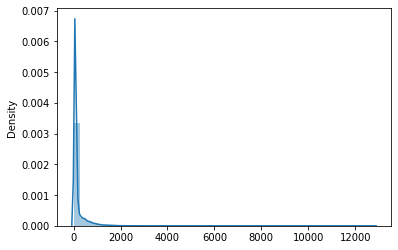

In [ ]:
import seaborn as sns
ax = sns.distplot(len_words_f)

In [ ]:
# testing on normality
from scipy.stats import anderson

result = anderson(len_words_m)

for i in range(len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print('normal',crit_val, sig_lev)
  else:
    print('not',crit_val, sig_lev)

not 0.576 15.0
not 0.656 10.0
not 0.787 5.0
not 0.918 2.5
not 1.092 1.0


## NGRAMS 

In [ ]:
import re

def generate_ngrams(speech, n):
  n_grams = []
  s = speech.lower()
  s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
  tokens = [token for token in s.split(" ") if token != ""]
  ngrams = zip(*[tokens[i:] for i in range(n)])
  ngr = [" ".join(ngram) for ngram in ngrams]

  return(ngr)

In [ ]:
# create female ngrams for counting adjective frequency counts
fem_ngrams = []
for i in df3_female.speech:
  ngr = generate_ngrams(i, 2)
  fem_ngrams.append(ngr)

Execution time: 0:00:09.911587 seconds


In [ ]:
# create male ngrams for counting adjective frequency counts
mal_ngrams = []
for i in df3_male.speech:
  ngr = generate_ngrams(i, 2)
  mal_ngrams.append(ngr)

Execution time: 0:00:18.568954 seconds


In [ ]:
# create female_speaker_female and female_speaker_male ngrams based on whether they contain a gendered word
fs_f = []
fs_m = []
for lijst in fem_ngrams:
  l1 = list((filter(lambda val: val if (val.split(" ")[1] in female) else '', [ngram for ngram in lijst] )))
  if len(l1) > 0:
    fs_f.append(l1)
  l2 = list((filter(lambda val: val if (val.split(" ")[1] in male) else '', [ngram for ngram in lijst] )))
  if len(l2)> 0:
    fs_m.append(l2)



In [ ]:
# create male_speaker_female and male_speaker_male ngrams based on whether they contain a gendered word
ms_f = []
ms_m = []
for lijst in mal_ngrams:
  l1 = list((filter(lambda val: val if (val.split(" ")[1] in female) else '', [ngram for ngram in lijst] )))
  if len(l1) > 0:
    ms_f.append(l1)
  l2 = list((filter(lambda val: val if (val.split(" ")[1] in male) else '', [ngram for ngram in lijst] )))
  if len(l2)> 0:
    ms_m.append(l2)



## Normalising gender topics brought up

In [ ]:
# empty lists to store the frequency of gendered words per debate in
len_fsf = []
len_fsm = []
len_msf = []
len_msm = []

In [ ]:
# per debate, store the length of the ngrams per speech in a list. 
# This length also means the amount of female/male terms, since 
# only gendered ngrams are saved
for l in fs_f:
  len_fsf.append(len(l))

for l in fs_m:
  len_fsm.append(len(l))

for l in ms_f:
  len_msf.append(len(l))

for l in ms_m:
  len_msm.append(len(l))



## Adjectives

In [ ]:
# all adjectives used in this research
physical_appearance = ['shorter', 'cute', 'plain', 'short', 'beautiful', 'big', 'appealing', 'grand', 'attractive', 'biggest', 'elegant', 'fascinating', 'fragile', 'pretty', 'ugly', 'blond', 'fit', 'fat', 'gorgeous', 'curvy', 'handsome', 'pleasing', 'hot', 'skinny', 'redhead', 'tiny', 'splendid', 'sexy', 'blonde', 'charming', 'small', 'unattractive', 'sized', 'muscular', 'thin', 'fashioned', 'large', 'fashionable', 'delightful', 'wider', 'basic', 'chubby', 'delicate', 'graceful', 'marvelous', 'exquisite', 'massive', 'superb', 'alluring', 'dazzling', 'good-looking', 'brunette', 'medium', 'magnificent', 'tall', 'youthful', 'larger', 'stunning', 'adorable', 'athletic', 'attractive', 'beautiful', 'big', 'blue-eyed', 'blushing', 'chubby', 'curvy', 'cute', 'fat', 'feeble', 'filthy', 'fit', 'glamorous', 'gorgeous', 'handsome', 'heavy', 'hot', 'lanky', 'large', 'lean', 'long', 'muscular', 'overweight', 'obese', 'petite', 'plain', 'pretty', 'skinny', 'slender', 'slim', 'sparkling', 'spotless', 'stunning', 'thin', 'ugliest', 'ugly', 'unattractive', 'unsightly', 'well-dressed', 'wide-eyed']

intellect_education = ['literate', 'effective', 'naive', 'moronic', 'insightful', 'well-read', 'adept', 'educational', 'brainy', 'keen', 'innovative', 'proficient', 'bright', 'alert', 'whiz', 'unintelligent', 'canny', 'ignorant', 'active', 'wise', 'sharp', 'crafty', 'ingenious', 'fresh', 'trained', 'agile', 'productive', 'advanced', 'useful', 'hardworking', 'scientific', 'stupid', 'astute', 'inventive', 'savvy', 'slow', 'ready', 'shrewd', 'deluded', 'quick', 'nimble', 'smart', 'competitive', 'numerate', 'uncultured', 'articulate', 'skull', 'qualified', 'academic', 'cultured', 'acute', 'professional', 'brisk', 'enlightening', 'successful', 'quick-witted', 'idiotic', 'irresponsible', 'foolish', 'informative', 'impertinent', 'dumb', 'uneducated', 'genius', 'academically', 'ambitious', 'pointed', 'intelligent', 'eggheaded', 'bold', 'inefficient', 'resourceful', 'smarter', 'multilingual', 'apt', 'clever', 'inactive', 'lazy', 'slick', 'illiterate', 'educated', 'genius', 'intellect', 'reasoned', 'perceptive', 'incisive', 'smart', 'deductive', 'insightful', 'meditative', 'involving', 'astute', 'intelligent', 'perceptive', 'calculating', 'logical', 'practical', 'complex', 'methodical', 'strategic', 'insightful', 'thoughtful', 'ingenious', 'robust', 'innovative', 'sophisticated', 'novel', 'imaginative', 'accomplished', 'fluent', 'significant', 'adept', 'ideal', 'smooth', 'advanced', 'industrious', 'skilled', 'competent', 'influential', 'skillful', 'constructive', 'instrumental', 'productive', 'superior', 'economical', 'proficient', 'qualified', 'expert', 'profitable', 'passionate', 'dedicated', 'studious', 'focused', 'motivated', 'driven', 'persistent', 'methodical', 'controlled', 'orderly', 'structured', 'detailed', 'precise', 'systematic', 'detail-oriented', 'accurate', 'exact', 'professional', 'punctual', 'dependable', 'resilient', 'diligent', 'disciplined']

emotionality_state_of_mind = ['contented', 'delighted', 'enjoyable', 'amazed', 'conscious', 'lively', 'hysterical', 'depressed', 'worse', 'pleased', 'awful', 'lot', 'satisfied', 'convinced', 'unhappy', 'tormented', 'lonely', 'mad', 'willing', 'viscerally', 'heartbroken', 'disappointing', 'elated', 'cheerful', 'upset', 'thrilled', 'somber', 'calm', 'fearful', 'disheartened', 'concerned', 'flabbergasted', 'scared', 'joyous', 'glad', 'sober', 'dissatisfied', 'indignant', 'inept', 'upsetting', 'excited', 'emotional', 'desperate', 'alive', 'disillusioned', 'pessimistic', 'baffled', 'distraught', 'uptight', 'unpatriotic', 'melancholy', 'depressing', 'surprised', 'apologetic', 'resentful', 'grateful', 'sickened', 'jubilant', 'clutched', 'distracted', 'merry', 'irritated', 'mournful', 'impassioned', 'unelectable', 'sullen', 'anxious', 'ashamed', 'gladly', 'sorrowful', 'distressed', 'apprehensive', 'irritable', 'bitter', 'reluctant', 'bewildered', 'fearing', 'embarrassed', 'giggly', 'happy', 'appalling', 'frustrated', 'content', 'bothered', 'compassionate', 'peaceful', 'offended', 'enraged', 'perturbed', 'disturbed', 'annoyed', 'childish', 'happier', 'furious', 'confident', 'afraid', 'optimistic', 'saddened', 'dreadful', 'hopeful', 'heated', 'uncomfortable', 'pleasant', 'exasperated', 'disappointed', 'outraged', 'frightened', 'fretful', 'empathetic', 'overjoyed', 'tragic', 'bad', 'disgusted', 'arrogant', 'confused', 'irate', 'nervous', 'tense', 'grumpy', 'happily', 'dismal', 'ecstatic', 'shocked', 'sad', 'joyful', 'worried', 'sympathetic', 'angry', 'affected', 'aroused', 'emotional', 'emotive', 'excited', 'fervent', 'fervid', 'hysterical', 'impassioned', 'livid', 'mad', 'moved', 'supercharged', 'thrilling', 'touched', 'unemotional', 'envious', 'disgusted', 'jealous', 'raged', 'alarmed', 'feared', 'hysteric', 'paniced', 'bitter', 'outraged', 'hateful', 'nervous', 'worried', 'pleasured', 'content', 'optimistic', 'relieved', 'affectionate', 'passionate', 'guilty', 'shameful', 'surprised', 'sad', 'unhappy', 'sorrowful', 'dejected', 'regretful', 'depressed', 'downcast', 'miserable', 'jolly', 'joyful', 'jovial', 'smiling', 'carefree', 'lucky', 'merry']

physical_state_condition = ['ailing', 'underdeveloped', 'ill', 'capable', 'firm', 'woozy', 'afflicted', 'tired', 'able', 'athletic', 'exasperated', 'overworked', 'fit', 'healthy', 'deceased', 'unwashed', 'thinner', 'adorable', 'drained', 'thirsty', 'exhausted', 'alive', 'epileptic', 'durable', 'diseased', 'infirm', 'weighty', 'energetic', 'awake', 'bruised', 'sick', 'incurable', 'poorly', 'sleepy', 'sporty', 'paralysed', 'unfit', 'stronger', 'disabled', 'fatigued', 'active', 'irritated', 'forceful', 'hungry', 'tall', 'strong', 'sore', 'starving', 'feverish', 'muscular', 'muscly', 'sturdy', 'strapping', 'robust', 'able-bodied', 'vigorous', 'hardy', 'fit', 'aerobicized', 'healthy', 'sporty', 'husky', 'hunky', 'beefy', 'ripped', 'shredded', 'buff', 'jacked', 'gymnastic', 'ill', 'unwell', 'poorly', 'ailing', 'indisposed', 'nauseous', 'nauseated', 'queasy', 'bilious', 'seasick', 'carsick', 'airsick', 'barfy', 'sick', 'tired', 'weak']

personality_traits = ['polite', 'brave', 'insulting', 'incompetent', 'amicable', 'naive', 'transparent', 'shameful', 'avoidable', 'awful', 'thoughtful', 'curious', 'silent', 'amiable', 'unfair', 'unthinkable', 'surprising', 'energetic', 'weirdy', 'absurd', 'reliable', 'mad', 'amusing', 'hopeless', 'comprehensive', 'friendly', 'courageous', 'ignorant', 'wacky', 'appreciative', 'silly', 'fabulous', 'affable', 'receptive', 'selfish', 'elegant', 'unpleasant', 'scared', 'nuts', 'annoying', 'toxic', 'reckless', 'forgiving', 'pessimistic', 'contentious', 'threatening', 'deluded', 'mindful', 'depressing', 'rude', 'distasteful', 'attacking', 'disagreeable', 'lovely', 'hyperactive', 'honourable', 'unacceptable', 'irritated', 'antipathetic', 'inconsistent', 'combative', 'kooky', 'aggressive', 'indefensible', 'consistent', 'inadequate', 'careful', 'affectionate', 'humble', 'trustworthy', 'independent', 'bewildered', 'progressive', 'marvellous', 'tolerant', 'louder', 'unbelievable', 'spiteful', 'inappropriate', 'pleasing', 'incisive', 'awesome', 'neighborly', 'embarrassing', 'dangerous', 'idiotic', 'critical', 'irresponsible', 'dirty', 'unjustifiable', 'robust', 'unreasonable', 'sensitive', 'pathetic', 'funny', 'peaceful', 'foolish', 'helpful', 'loyal', 'insane', 'nutty', 'superb', 'crazy', 'gentle', 'loving', 'approachable', 'furious', 'detailed', 'dreadful', 'intolerable', 'antisocial', 'lousy', 'unhelpful', 'assailing', 'violent', 'destructive', 'humorous', 'provocative', 'terrible', 'stable', 'bold', 'selfless', 'catastrophic', 'timid', 'beneficial', 'frustrating', 'unclear', 'charming', 'radical', 'unsurprising', 'intrusive', 'romantic', 'delightful', 'vital', 'favorable', 'generous', 'advancing', 'attentive', 'creative', 'unfaithful', 'unreliable', 'sympathetic', 'adaptable', 'courageous', 'giving', 'neat', 'self-confident', 'adventurous', 'creative', 'self-disciplined', 'affable', 'decisive', 'gregarious', 'non-judgemental', 'sensible', 'affectionate', 'dependable', 'hardworking', 'observant', 'sensitive', 'agreeable', 'determined', 'helpful', 'optimistic', 'shy', 'ambitious', 'diligent', 'hilarious', 'organized', 'silly', 'amiable', 'diplomatic', 'honest', 'passionate', 'sincere', 'amicable', 'discreet', 'humorous', 'patient', 'amusing', 'dynamic', 'imaginative', 'persistent', 'socialable', 'artistic', 'easy-going', 'impartial', 'pioneering', 'straight-forward', 'brave', 'independent', 'philosophical', 'sympathetic', 'bright', 'efficient', 'industrious', 'placid', 'talkative', 'broad-minded', 'energetic', 'intelligent', 'plucky', 'thoughtful', 'calm', 'enthusiastic', 'intellectual', 'polite', 'tidy', 'careful', 'extroverted', 'intuitive', 'popular', 'tough', 'charismatic', 'exuberant', 'inventive', 'trustworthy', 'charming', 'fair-minded', 'joyful', 'practical', 'unassuming', 'chatty', 'faithful', 'kind', 'pro-active', 'understanding', 'cheerful', 'fearless', 'kooky', 'quick-witted', 'upbeat', 'clever', 'forceful', 'laid-back', 'quiet', 'versatile', 'communicative', 'frank', 'likable', 'rational', 'warmhearted', 'compassionate', 'friendly', 'loving', 'reliable', 'wild', 'conscientious', 'funny', 'loyal', 'reserved', 'wise', 'considerate', 'generous', 'resourceful', 'witty', 'convivial', 'gentle', 'modest', 'romantic', 'aggressive', 'cynical', 'impolite', 'nervous', 'sneaky', 'aloof', 'deceitful', 'impulsive', 'obstinate', 'stubborn', 'defensive', 'inconsiderate', 'overcritical', 'arrogant', 'devious', 'indecisive', 'overemotional', 'sullen', 'bad-tempered', 'indiscreet', 'patronizing', 'tactless', 'belligerent', 'dishonest', 'inflexible', 'pig-headed', 'thoughtless', 'big-headed', 'domineering', 'intolerant', 'pessimistic', 'touchy', 'boastful', 'egotistical', 'introverted', 'boring', 'finicky', 'irresponsible', 'possessive', 'unpredictable', 'bossy', 'foolish', 'jealous', 'quick-tempered', 'unreliable', 'callous', 'gussy', 'lazy', 'resentful', 'untidy', 'careless', 'gullible', 'loud', 'rude', 'untrustworthy', 'clingy', 'grumpy', 'mean', 'secretive', 'vague', 'confrontational', 'hostile', 'moody', 'self-centered', 'vain', 'cowardly', 'idle', 'narrowminded', 'selfish', 'vulgar', 'cruel', 'impatient', 'nasty', 'silly', 'weak-willed']

age = ['14-year', 'older', 'adolescence', 'old', 'teenage', 'eldest', 'undergraduates', 'veteran', 'newborn', 'tired', '24-week', 'blooming', 'senior', 'infantile', 'recent', 'baby', '60-year', 'fossil', 'aged', 'premature', '21st', '90-year', 'modern', '20s', '84-year', 'bygone', '95-year', 'old-fashioned', 'babyish', 'decrepit', '13-year', 'gray', '15-year', 'younger', '27-year', '2, 517', 'adolescent', 'stillborn', '92-year', 'budding', 'fashioned', '80-year', '34-year', 'antique', 'elderly', '79-year', 'undergraduate', 'blossoming', 'teen', '22-year', 'oldest', 'mature', '38-year', 'ancient', 'youngsters', '92nd', '12-year', 'venerable', 'youthful', 'young', 'versed', 'youngest', '46-year', 'adult', 'aging', 'geriatric', 'lived', 'senescent', 'senior', 'junior', 'oldish', 'pensioned', 'retired', 'youngish', 'minor', 'underage', 'immature', 'preteen', 'babyish', 'youthful']

rela_gender_status = ['bachelor', 'married', 'joined', 'unwed', 'united', 'wedded', 'widower', 'widowed', 'marital', 'husbandless', 'spouseless', 'espoused', 'unmarried', 'unattached', 'unwedded', 'wed', 'remarriage', 'uncoupled', 'single', 'sole', 'mated', 'unmarried', 'wifeless', 'espoused', 'nonmarital', 'marital']

In [ ]:
# save the lists in one big list and remove duplicates
lists = [physical_appearance] + [intellect_education] + [emotionality_state_of_mind] + [physical_state_condition] + [personality_traits] + [age] + [rela_gender_status]
sets = []
for l in range(len(lists)):
    l2 = set(lists[l])
    sets.append(list(l2))

# save the terms of the categories to save frequency counts in later
terms = ['physical_appearance', 'intellect_education', 'emotionality_state_of_mind', 'physical_state_condition', 'personality_traits', 'age', 'rela_gender_status']

In [ ]:
# remove adjectives that are not in the models
for l in sets:
    for word in l:
        if word not in female_model.wv:
            l.remove(word)
            
for l in sets:
    for word in l:
        if word not in male_model.wv:
            l.remove(word)

# Counting total adjectives
## The code below is to count the total amount per adjective to see which adjectives are used most
- The codes below loop through all the gendered ngrams. fs_f is a list of ngrams in the female_speaker dataset with female words. 
- fs_f with male words
- ms_f male_speaker with female words
- ms_m male_speaker with male words

- the code created an empty dictionary, and then loops through the adjective lists. Per adjective in the sets, it loops through the debates. The debates are stored in gendered ngrams. If the adjective is present in one of the ngrams, the debate gets a frequency count. If multiple adjectives within a category are present multiple times, multiple frequency counts can be found.

In [ ]:
# FS - F
adjs_fsf = {}
for l in range(len(sets)):
  adjs_fsf["{}".format(l)] = {}
  counter = []
  for word in sets[l]:
    counter = 0
    adjs_fsf["{}".format(l)][word] = {}
    for lijst in fs_f:
      for ngram in lijst:
        if word == ngram.split(" ")[0]:
          counter+=1
    adjs_fsf["{}".format(l)][word] = counter
      

In [ ]:
# FS - m
adjs_fsm = {}
for l in range(len(sets)):
  adjs_fsm["{}".format(l)] = {}
  counter = []
  for word in sets[l]:
    counter = 0
    adjs_fsm["{}".format(l)][word] = {}
    for lijst in fs_m:
      for ngram in lijst:
        if word == ngram.split(" ")[0]:
          counter+=1
    adjs_fsm["{}".format(l)][word] = counter
      

In [ ]:
# FS - m
adjs_msf = {}
for l in range(len(sets)):
  adjs_msf["{}".format(l)] = {}
  counter = []
  for word in sets[l]:
    counter = 0
    adjs_msf["{}".format(l)][word] = {}
    for lijst in ms_f:
      for ngram in lijst:
        if word == ngram.split(" ")[0]:
          counter+=1
    adjs_msf["{}".format(l)][word] = counter
      

In [ ]:
# FS - m
adjs_msm = {}
for l in range(len(sets)):
  adjs_msm["{}".format(l)] = {}
  counter = []
  for word in sets[l]:
    counter = 0
    adjs_msm["{}".format(l)][word] = {}
    for lijst in ms_m:
      for ngram in lijst:
        if word == ngram.split(" ")[0]:
          counter+=1
    adjs_msm["{}".format(l)][word] = counter
      

## adj frequencies

In [ ]:
dfs_fsf = []
for k, i in adjs_fsf.items():
  dfs_fsf.append(pd.DataFrame({'word': i.keys(), 'count': i.values()}
                              ))

In [ ]:
dfs_msf = []
for k, i in adjs_msf.items():
  dfs_msf.append(pd.DataFrame({'word': i.keys(), 'count': i.values()}
                              ))

In [ ]:
dfs_fsm = []
for k, i in adjs_fsm.items():
  dfs_fsm.append(pd.DataFrame({'word': i.keys(), 'count': i.values()}
                              ))

In [ ]:
dfs_msm = []
for k, i in adjs_msm.items():
  dfs_msm.append(pd.DataFrame({'word': i.keys(), 'count': i.values()}
                              ))

In [ ]:
dfs_msm[1].sort_values('count', ascending=False)[:6]

,word,count
107,knowing,32
47,wise,24
38,dedicated,21
73,clever,18
56,successful,10
89,educated,10


In [ ]:
for lijst in fs_m:
  for ngram in lijst:
    if ngram.split(" ")[0] == 'sick':
      print(ngram)

sick man
sick man
sick man
sick man
sick man
sick man
sick husband
sick man
sick he
sick man


In [ ]:
counter = 0
for s in df3_male.speech:
  sp = s.lower()
  if "sick man of europe" in sp:
    counter +=1 
    
print(counter)

8


# Counting adjectives per speech
## The code below is to count the frequencies of the adjectives per speech. These outcomes will be used to compare statistical differences later.
- The codes below loop through all the gendered ngrams. fs_f is a list of ngrams in the female_speaker dataset with female words. 
- fs_f with male words
- ms_f male_speaker with female words
- ms_m male_speaker with male words

- the code created an empty dictionary, and then loops through the adjective lists. Per adjective in the sets, it loops through the debates. The debates are stored in gendered ngrams. If the adjective is present in one of the ngrams, the debate gets a frequency count. If multiple adjectives within a category are present multiple times, multiple frequency counts can be found.

In [ ]:
# FS - F
count_fsf = {}
adj_fsf = []
for l in range(len(sets)):
  count_fsf["{}".format(l)] = {}
  counter = []
  for lijst in fs_f:
    county = 0
    for ngram in lijst:
      for word in sets[l]:
        if word == ngram.split(" ")[0]:
          adj_fsf.append(word)
          county += 1
    counter.append(county)
  count_fsf["{}".format(l)] = counter
      

In [ ]:
# FS - M
count_fsm = {}
adj_fsm = []
for l in range(len(sets)):
  count_fsm["{}".format(l)] = {}
  counter = []
  for lijst in fs_m:
    county = 0
    for ngram in lijst:
      for word in sets[l]:
        if word == ngram.split(" ")[0]:
          adj_fsm.append(word)
          county += 1
    counter.append(county)
  count_fsm["{}".format(l)] = counter
      

In [ ]:
# MS - F
count_msf = {}
adj_msf = []
for l in range(len(sets)):
  count_msf["{}".format(l)] = {}
  counter = []
  for lijst in ms_f:
    county = 0
    for ngram in lijst:
      for word in sets[l]:
        if word == ngram.split(" ")[0]:
          adj_msf.append(word)
          county += 1
    counter.append(county)
  count_msf["{}".format(l)] = counter
      

In [ ]:
# MS - M
count_msm = {}
adj_msm = []
for l in range(len(sets)):
  count_msm["{}".format(l)] = {}
  counter = []
  for lijst in ms_m:
    county = 0
    for ngram in lijst:
      for word in sets[l]:
        if word == ngram.split(" ")[0]:
          adj_msm.append(word)
          county += 1
    counter.append(county)
  count_msm["{}".format(l)] = counter
      

## Normalised frequency counts

In [ ]:
# store all values in a list
fsf_lists = list(count_fsf.values())
fsm_lists = list(count_fsm.values())
msf_lists = list(count_msf.values())
msm_lists = list(count_msm.values())

In [ ]:
# run over the values and normalise the frequencies, based on the earlier prepared
# total frequencies of bringing up gender topics
new_fsf = []

for l in fsf_lists:
  new_l = []
  for x in range(len(l)):
    new_l.append(l[x] / len_fsf[x])
  new_fsf.append(new_l)


In [ ]:
# run over the values and normalise the frequencies, based on the earlier prepared
# total frequencies of bringing up gender topics

new_fsm = []

for l in fsm_lists:
  new_l = []
  for x in range(len(l)):
    new_l.append(l[x] / len_fsm[x])
  new_fsm.append(new_l)


In [ ]:
# run over the values and normalise the frequencies, based on the earlier prepared
# total frequencies of bringing up gender topics

new_msf = []

for l in msf_lists:
  new_l = []
  for x in range(len(l)):
    new_l.append(l[x] / len_msf[x])
  new_msf.append(new_l)


In [ ]:
# run over the values and normalise the frequencies, based on the earlier prepared
# total frequencies of bringing up gender topics

new_msm = []

for l in msm_lists:
  new_l = []
  for x in range(len(l)):
    new_l.append(l[x] / len_msm[x])
  new_msm.append(new_l)


# calculate the mean frequencies per category for barplots in the thesis

In [ ]:
mean_fsf = []
for l in new_fsf:
  mean_fsf.append(statistics.mean(l))

In [ ]:
mean_fsm = []
for l in new_fsm:
  mean_fsm.append(statistics.mean(l))

In [ ]:
mean_msf = []
for l in new_msf:
  mean_msf.append(statistics.mean(l))

In [ ]:
mean_msm = []
for l in new_msm:
  mean_msm.append(statistics.mean(l))

In [ ]:
mean_fsf

[0.0004800796262685396,
 0.0008087428315170448,
 0.0014832998736612766,
 0.0006400796030424871,
 0.0016261163290544908,
 0.010138412688694299,
 0.00108252216612039]

In [ ]:
mean_msf

[0.0006073995776378566,
 0.000599503769068846,
 0.001484962257325226,
 0.0002606725761012854,
 0.0012810533059877012,
 0.005524882186253284,
 0.0004420009665745466]

In [ ]:
mean_fsm

[0.00043457916018890916,
 0.0003809619994228226,
 0.001459454761475113,
 0.0004898276002489185,
 0.0017704607891180378,
 0.005184575965647686,
 0.00012616443357331625]

In [ ]:
mean_msm

[0.0005852179559421749,
 0.0006789073638183455,
 0.0015745784029756495,
 0.0002107837466678062,
 0.001982662232623448,
 0.0032031626784286434,
 0.00014252886734152768]

## TESTING

In [ ]:
from scipy import stats
x = [1, 3, 5, 7, 9]
y = [2, 4, 6, 8, 10,100,200000,8,10,100,200, 200]
stats.kruskal(x, y)

KruskalResult(statistic=4.030870279146136, pvalue=0.04467488965016227)

In [ ]:
# Kruskal results for female terms
for i in range(len(fsf_lists)):
  print(terms[i], stats.kruskal(new_fsf[i], new_msf[i]))

physical_appearance KruskalResult(statistic=0.06502005973227509, pvalue=0.7987305810839839)
intellect_education KruskalResult(statistic=15.37053144348747, pvalue=8.835555957709315e-05)
emotionality_state_of_mind KruskalResult(statistic=1.2047030173905342, pvalue=0.2723837187942925)
physical_state_condition KruskalResult(statistic=31.127172877197303, pvalue=2.4166460731672235e-08)
personality_traits KruskalResult(statistic=24.792541849331656, pvalue=6.384402023454849e-07)
age KruskalResult(statistic=261.8146983722246, pvalue=6.901769011372828e-59)
rela_gender_status KruskalResult(statistic=41.98588664261235, pvalue=9.193457013745516e-11)


In [ ]:
# Kruskal results for male terms
for i in range(len(fsf_lists)):
  print(terms[i], stats.kruskal(new_fsm[i], new_msm[i]))

physical_appearance KruskalResult(statistic=0.0642941041964245, pvalue=0.7998333225790788)
intellect_education KruskalResult(statistic=6.602191634098807, pvalue=0.010185332073284408)
emotionality_state_of_mind KruskalResult(statistic=1.9918006365959262, pvalue=0.1581527342547406)
physical_state_condition KruskalResult(statistic=8.340034659027248, pvalue=0.003878085794180227)
personality_traits KruskalResult(statistic=4.069899307675, pvalue=0.043653876497933064)
age KruskalResult(statistic=68.70719909833474, pvalue=1.142231880653871e-16)
rela_gender_status KruskalResult(statistic=0.26648567875882523, pvalue=0.6056990110568556)


# Word Clouds Adjectives
## these wordclouds are made for thesis visualisations

In [ ]:
for s in df3_female.speech:
  sp = s.lower()
  if "stupid woman" in sp:
    print(s)

Thank you, Mr Speaker. I would just like to ask, after your finding that individuals who are found to have made unwelcome remarks should apologise, why it is that when an Opposition Member found that you had called me a “stupid woman”, you did not apologise in this Chamber.
On a point of order, Mr Speaker. Could you confirm that it is not acceptable parliamentary language to call a woman a “stupid woman” in this House? As regards the point of order from the Leader of the House, may I add the words “Me too”?
Further to that point of order, Mr Speaker. It is clear that this has raised some significant upset, certainly on the Government side and, I suspect, among some women —  [Interruption.] The issue of the Leader of the Opposition being alleged to have called someone a “stupid woman” — to have called the Prime Minister of our country a “stupid woman” — has clearly caused high feeling. It is also clear that many hon. and right hon. Members have evidence to show you. I am really grateful

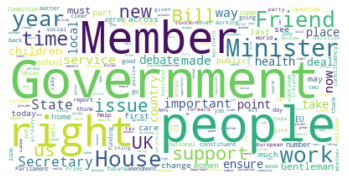

In [ ]:
dff3_female = df3_female.sample(50000)
text = " ".join(review for review in dff3_female.speech)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hon","will","need","make","know","want","many","one", "say", "said"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

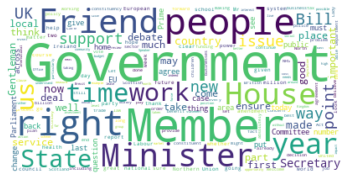

In [ ]:
dff3_male = df3_male.sample(50000)
text = " ".join(review for review in dff3_male.speech)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hon","will","need","make","know","want","many","one", "say", "said"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

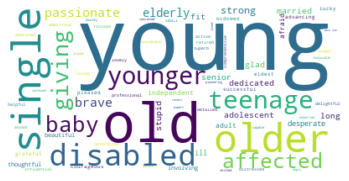

In [ ]:
# FS-F
text = " ".join(review for review in adj_fsf)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hon","will","need","make","know","want","many","one", "say", "said"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

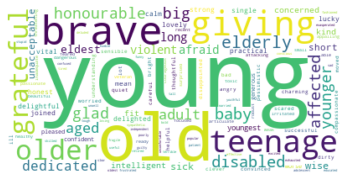

In [ ]:
# FS-M
text = " ".join(review for review in adj_fsm)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hon","will","need","make","know","want","many","one", "say", "said"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

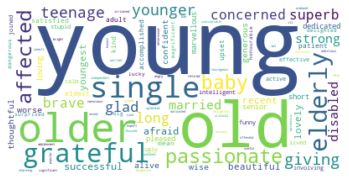

In [ ]:
# MS-F
text = " ".join(review for review in adj_msf)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hon","will","need","make","know","want","many","one", "say", "said"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

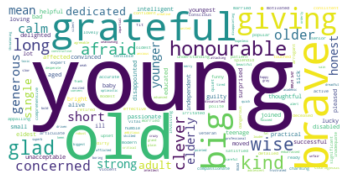

In [ ]:
# MS-M
text = " ".join(review for review in adj_msm)

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["hon","will","need","make","know","want","many","one", "say", "said"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",collocations=False).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()